# Lecture 20 Principle Component Analysis 

# Download data to be used at https://drive.google.com/file/d/1OquoecvAvOQyyfr6R7MwgxZjVXr4xGa4/view?usp=sharing

- A unsupervised machine learning algorithm
- A dimentionality reduction algorithm - sometimes less is more!
- and many other purposes

### It transforms high-dimensions data into lower-dimensions while retaining as much information as possible.

It is extremely useful when your dataset have a lot of features (more features means low efficiency!)

"I like to compare PCA with writing a book summary.
Finding the time to read a 1000-pages book is a luxury that few can afford. Wouldn’t it be nice if we can summarize the most important points in just 2 or 3 pages so that the information is easily digestible even by the busiest person? We may lose some information in the process, but hey, at least we get the big picture."

#### Most of the course materials are from https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d

## How does PCA work?

It’s a two-step process. We can’t write a book summary if we haven’t read or understood the content of the book.
PCA works the same way — understand, then summarize.

Human understands the meaning of a storybook through the use of expressive language. Unfortunately, PCA doesn’t speak English. It has to find meaning within our data through its preferred language, mathematics.


- Can PCA understand which part of our data is important?
- Can we mathematically quantify the amount of information embedded within the data?

The answer is variance. The greater the variance, the more the information. Vice versa.

$$
S^2 = \frac{1}{n}\sum{(x_i-x_{mean})^2}
$$

Suppose that we are playing a guessing game with our friends. The game is simple. Our friends would cover their faces and we need to guess who’s who based solely on their height. Being the good friends that we are, we remember how tall everyone is.

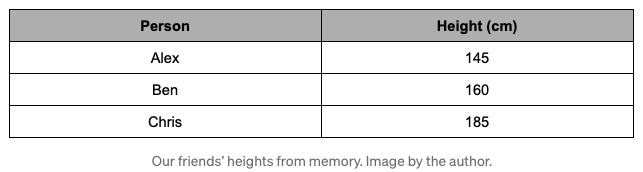

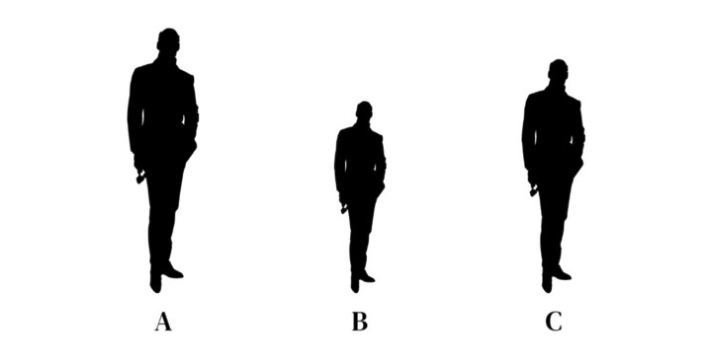

Without a doubt, I am going to say that Person A is Chris, Person B is Alex, and Person C is Ben.
Now, let’s try and guess a different group of friends.

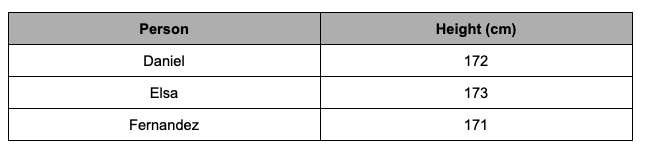

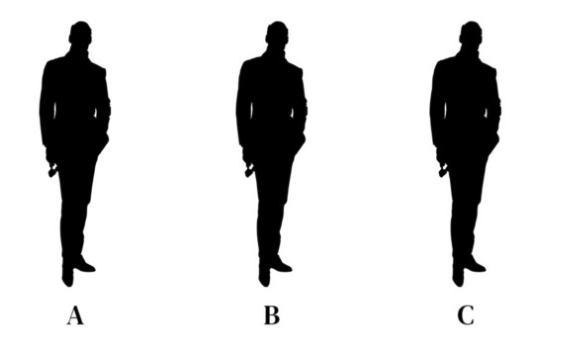

Can you guess who is who?

When our data has a higher variance, it holds more information. This is why we keep hearing PCA and maximum variance in the same sentence. 
From Wikipedia: PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

In the eyes of PCA, variance is an objective and mathematical way to quantify the amount of information in our data.
Variance is information.
To drive the point home, I propose a rematch for the guessing game, only that this time, we get to guess who’s who based on their height and weight.

Round 2 game.

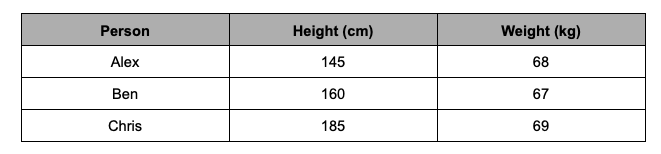

Does the weight information help?

The weight differences are so small (a.k.a small variance), it doesn’t help me differentiate our friends at all. I still had to rely mostly on height to make my guesses.
Intuitively, we have just reduced our data from 2-dimensions to 1-dimension. The idea is that we can selectively keep the variables with higher variances and then forget about the variables with lower variance.
But what if-, just what if height and weight have the same variance? Does it mean we can no longer reduce the dimensionality of this data set? I’d like to illustrate this with a sample dataset.

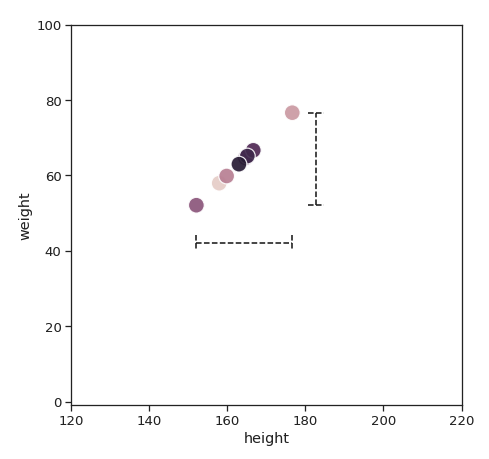

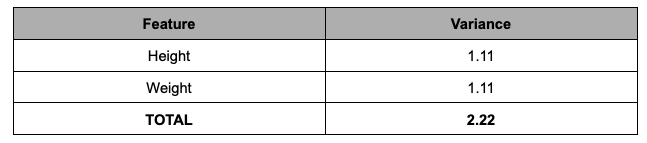

In this case, it’s very difficult to choose the variables we want to delete. If I throw away either one of the variables, we are throwing away half of the information.

Can we keep both?

Perhaps, with a different perspective.

The best storybooks always have hidden themes that are not written but implied. Reading each chapter individually wouldn’t make sense. But if we read all of it, it gives us enough context to piece the puzzles together — the underlying plot emerges.

Up until now, we have only been looking at the variance of height and weight individually. Instead of limiting ourselves to choose just one or the other, why not combine them?

When we look closer at our data, the maximum amount of variance lies not in the x-axis, not in the y-axis, but a diagonal line across. The second-largest variance would be a line 90 degrees that cuts through the first.

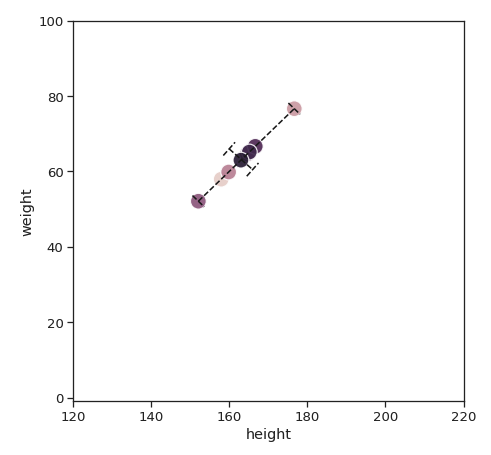

To represent these 2 lines, PCA combines both height and weight to create two brand new variables. It could be 30% height and 70% weight, or 87.2% height and 13.8% weight, or any other combinations depending on the data that we have.

These two new variables are called the first principal component (PC1) and the second principal component (PC2). Rather than using height and weight on the two axes, we can use PC1 and PC2 respectively.

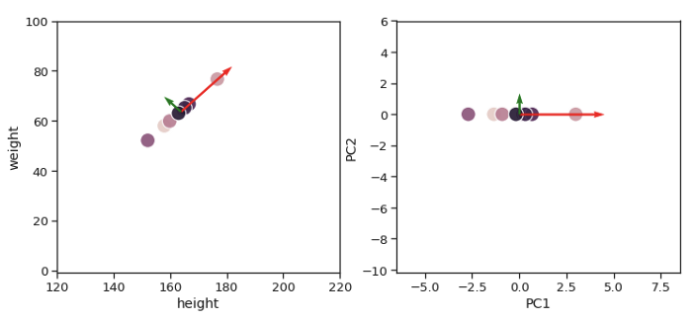

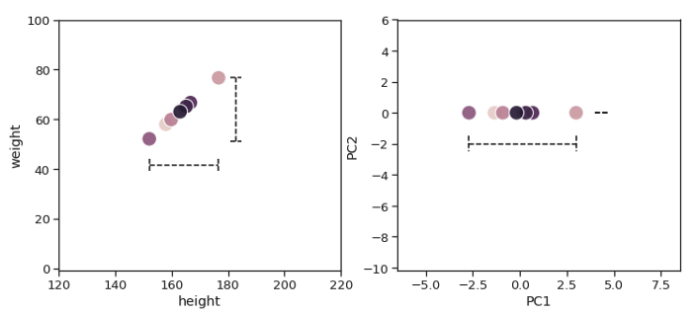

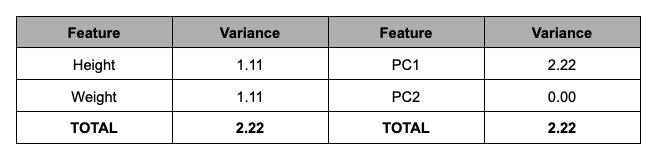

PC1 alone can capture the total variance of Height and Weight combined. Since PC1 has all the information, you already know the drill — we can be very comfortable in removing PC2 and know that our new data is still representative of the original data.

When it comes to real data, more often than not, we won’t get a principal component that captures 100% of the variances. Performing a PCA will give us N number of principal components, where N is equal to the dimensionality of our original data. From this list of principal components, we generally choose the least number of principal components that would explain the most amount of our original data.

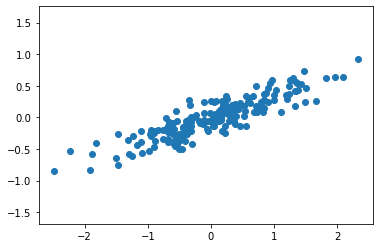

In [6]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [8]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


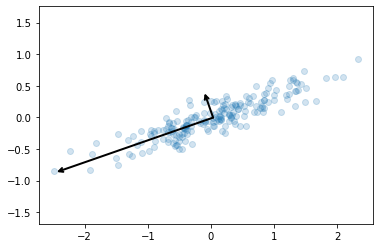

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


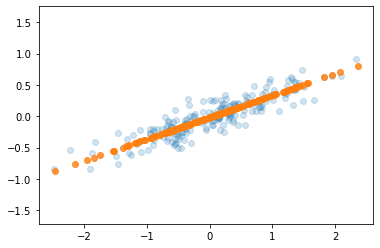

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

dc = sio.loadmat('dc_hyper.mat')
dc = dc["Inorm"]

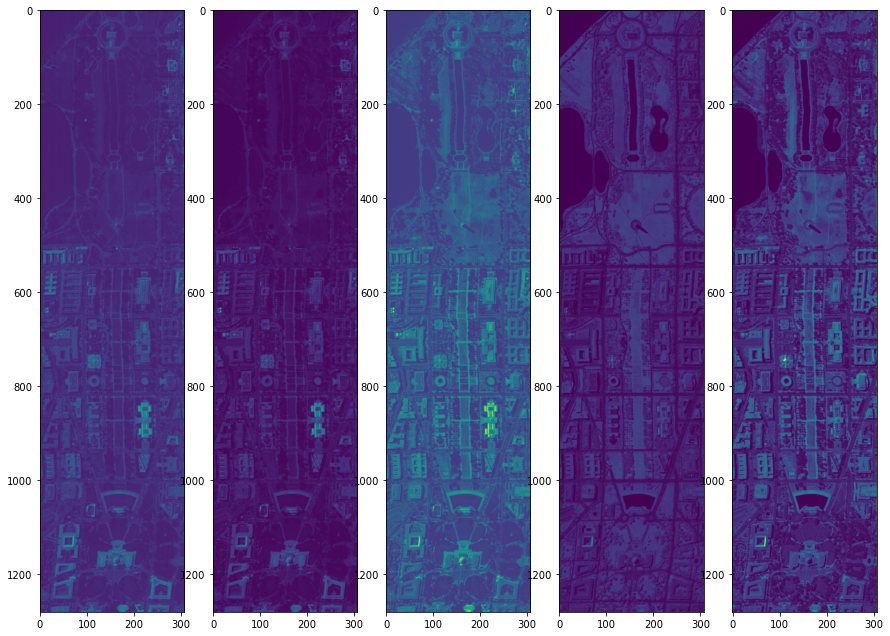

In [40]:
fig,ax = plt.subplots(1,5, figsize=(15,20))
ax[0].imshow(dc[:,:,0])
ax[1].imshow(dc[:,:,10])
ax[2].imshow(dc[:,:,50])
ax[3].imshow(dc[:,:,100])
ax[4].imshow(dc[:,:,150])

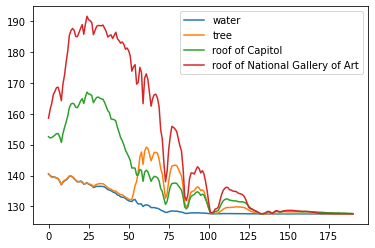

In [14]:
plt.plot(dc[320,28,:], label = "water")
plt.plot(dc[117,87,:], label = "tree")
plt.plot(dc[1173,189,:], label = "roof of Capitol")
plt.plot(dc[840,218,:], label = "roof of National Gallery of Art")
plt.legend()

In [15]:
X = dc.reshape(-1, dc.shape[2])
X.shape

(392960, 191)

40.333077907562256


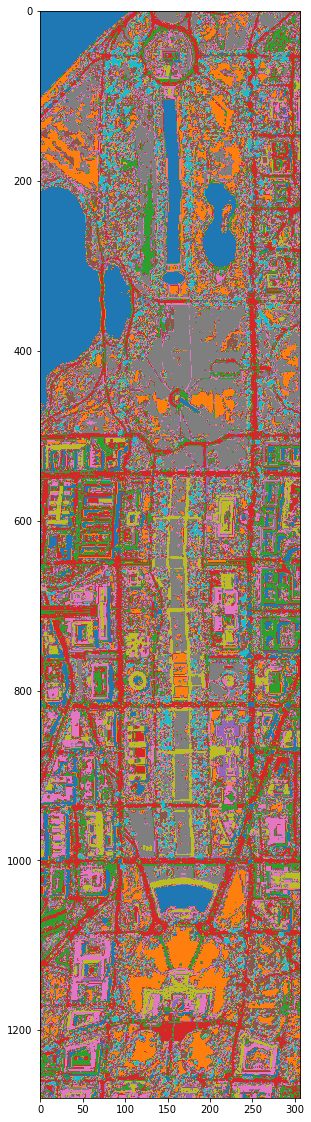

In [90]:
from sklearn.cluster import KMeans
import time
kmeans = KMeans(n_clusters=10)
t1 = time.time()
kmeans.fit(X)
t2 = time.time()
print(t2-t1)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

yimg = np.reshape(y_kmeans, (dc.shape[0],dc.shape[1]))

fig,ax = plt.subplots(1,1,figsize=(10,20))
ax.imshow(yimg, cmap=plt.get_cmap("tab10"))

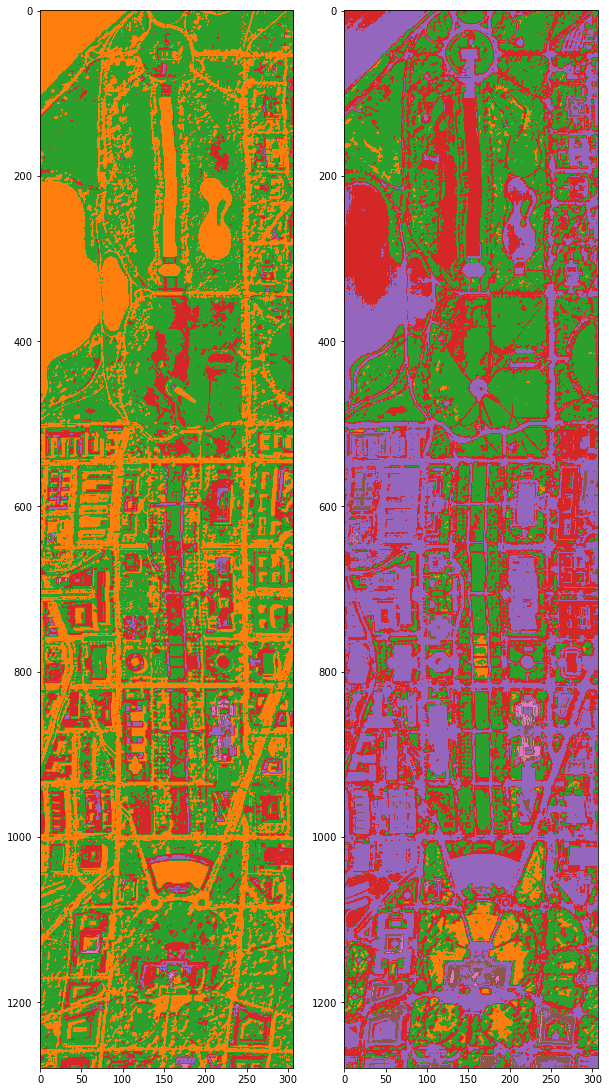

In [16]:
pca = PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)

pca1 = np.reshape(X_pca[:,0], (dc.shape[0],dc.shape[1]))
pca2 = np.reshape(X_pca[:,1], (dc.shape[0],dc.shape[1]))

fig,ax = plt.subplots(1,2,figsize=(10,20))
ax[0].imshow(pca1, cmap=plt.get_cmap("tab10"))
ax[1].imshow(pca2, cmap=plt.get_cmap("tab10"))

7.832530975341797


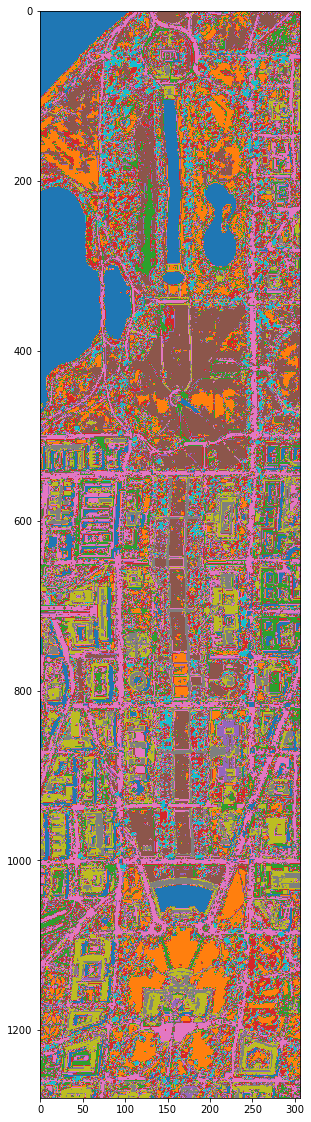

In [18]:
from sklearn.cluster import KMeans
import time

kmeans = KMeans(n_clusters=10)
t1 = time.time()
kmeans.fit(X_pca)
t2 = time.time()
print(t2-t1)
y_kmeans = kmeans.predict(X_pca)
centers = kmeans.cluster_centers_

yimg = np.reshape(y_kmeans, (dc.shape[0],dc.shape[1]))

fig,ax = plt.subplots(1,1,figsize=(10,20))
ax.imshow(yimg, cmap=plt.get_cmap("tab10"))

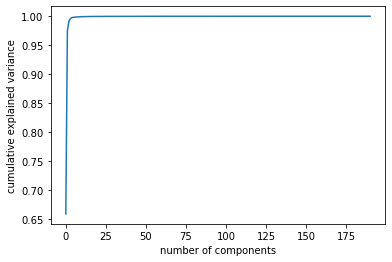

In [95]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

(0.0, 10.0)

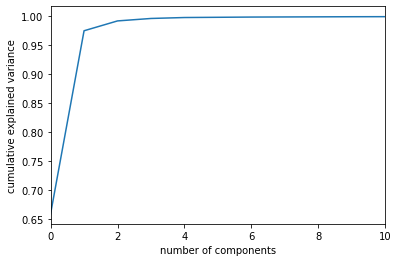

In [97]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,10)

35.23805212974548
7.153426885604858


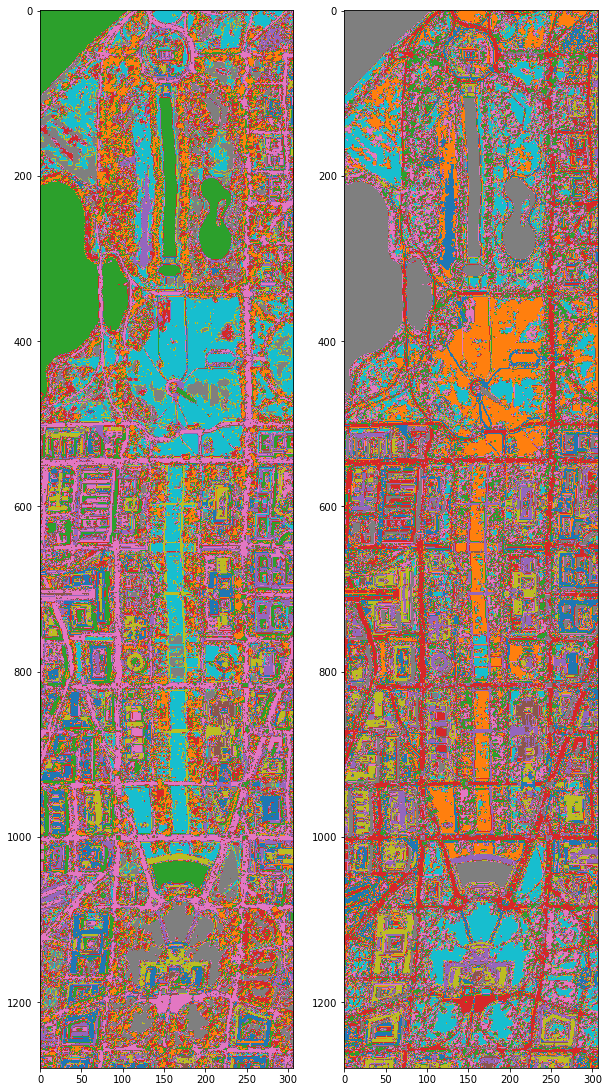

In [99]:
from sklearn.cluster import KMeans
import time

kmeans = KMeans(n_clusters=10)
t1 = time.time()
kmeans.fit(X)
t2 = time.time()
print(t2-t1)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

yimg1 = np.reshape(y_kmeans, (dc.shape[0],dc.shape[1]))


pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

kmeans = KMeans(n_clusters=10)
t1 = time.time()
kmeans.fit(X_pca)
t2 = time.time()
print(t2-t1)
y_kmeans = kmeans.predict(X_pca)
centers = kmeans.cluster_centers_

yimg2 = np.reshape(y_kmeans, (dc.shape[0],dc.shape[1]))

fig,ax = plt.subplots(1,2,figsize=(10,20))
ax[0].imshow(yimg1, cmap=plt.get_cmap("tab10"))
ax[1].imshow(yimg2, cmap=plt.get_cmap("tab10"))

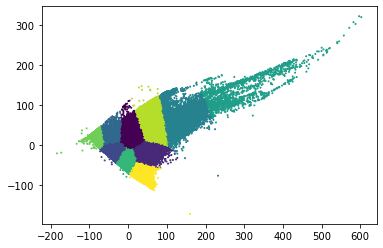

In [102]:
plt.scatter(X_pca[:,0],X_pca[:,1],s=1,c=y_kmeans)

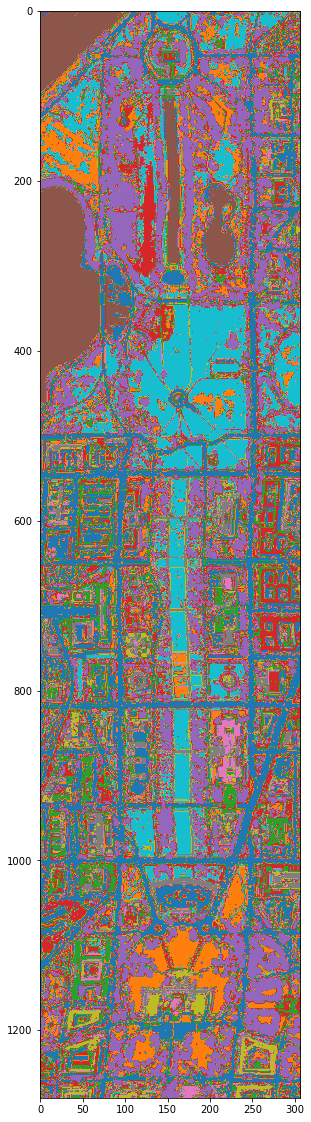

In [100]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=10).fit(X_pca)
labels = gmm.predict(X_pca)

yimg3 = np.reshape(labels, (dc.shape[0],dc.shape[1]))

fig,ax = plt.subplots(1,1,figsize=(10,20))
ax.imshow(yimg3, cmap=plt.get_cmap("tab10"))

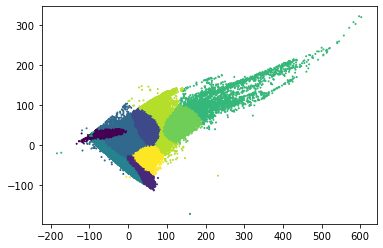

In [103]:
plt.scatter(X_pca[:,0],X_pca[:,1],s=1,c=labels)

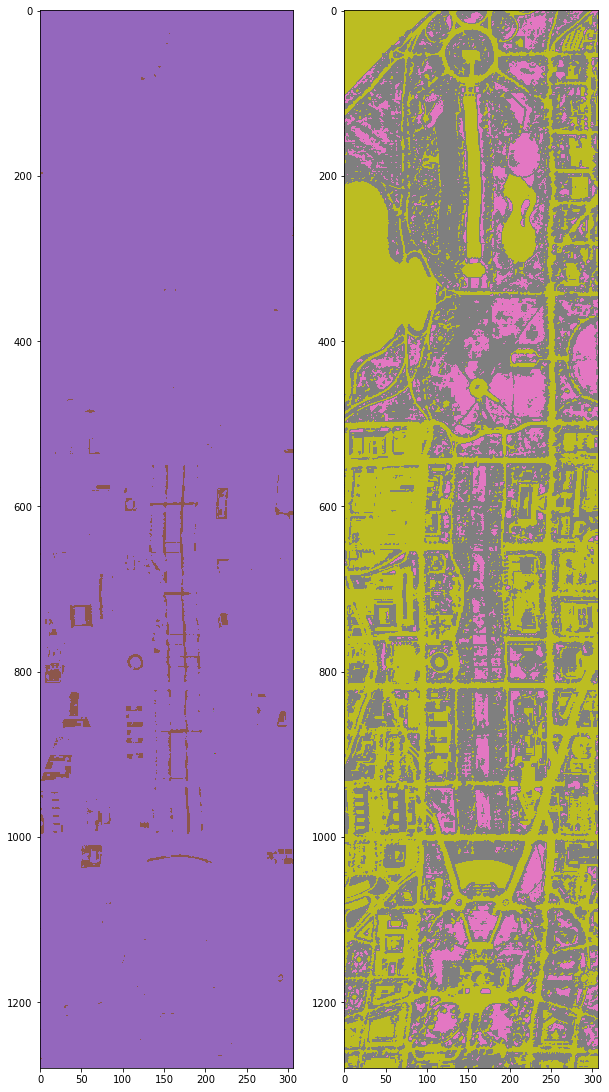

In [21]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=10)
ica.fit(X)
X_ica = ica.transform(X)

ica1 = np.reshape(X_ica[:,0], (dc.shape[0],dc.shape[1]))
ica2 = np.reshape(X_ica[:,1], (dc.shape[0],dc.shape[1]))

fig,ax = plt.subplots(1,2,figsize=(10,20))
ax[0].imshow(ica1, cmap=plt.get_cmap("tab10"))
ax[1].imshow(ica2, cmap=plt.get_cmap("tab10"))

10.384554862976074


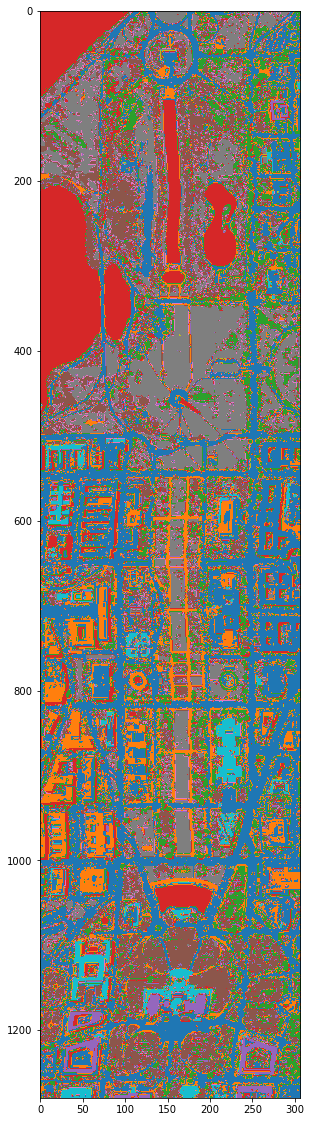

In [23]:
from sklearn.cluster import KMeans
import time

kmeans = KMeans(n_clusters=10)
t1 = time.time()
kmeans.fit(X_ica)
t2 = time.time()
print(t2-t1)
y_kmeans = kmeans.predict(X_ica)
centers = kmeans.cluster_centers_

yimg = np.reshape(y_kmeans, (dc.shape[0],dc.shape[1]))

fig,ax = plt.subplots(1,1,figsize=(10,20))
ax.imshow(yimg, cmap=plt.get_cmap("tab10"))